<a href="https://colab.research.google.com/github/ActiveStacks/ExpermentsThesis/blob/main/EXPERMIENT_CODELLM_2A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [5]:
df2 = pd.read_csv(path2)

In [6]:
df2.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [7]:
df2.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"
...,...,...,...,...,...,...,...,...,...
2776017,3302332,file,WARNING,Logging found,"Log.w(NotificationCenter.TAG, (Throwable)o);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(NotificationCenter.TAG, (Throwable)o);"
2776519,3302837,file,WARNING,Logging found,"Log.d((String)string2, (String)this.zzh(string...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d((String)string2, (String)this.zzh(string..."
2776785,3303105,file,WARNING,Logging found,"Log.w(""GoogleApiAvailability"", concat2);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", concat2);"
2776819,3303139,file,WARNING,Insecure functions found,public static <TResult> Task<TResult> call(fin...,CWE-676,Use of Potentially Dangerous Function,1,public static <TResult> Task<TResult> call(fin...


In [8]:
df2.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [9]:
df2.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
2776822,3303142,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,0,this.zzq = bl;
2776823,3303143,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,0,this.zzr = string2;
2776824,3303144,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,0,this.zzs = zze2;
2776825,3303145,file,INFO,Hardcoded HTTP url found,private CellResolution parseCellResolution(Xml...,CWE-312,Cleartext Storage of Sensitive Information,1,private CellResolution parseCellResolution(Xml...
2776826,3303146,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);"


In [10]:
df2.shape

(2776827, 9)

In [11]:
df2.describe()

,index,Vulnerability_status
count,2.776827e+06,2.776827e+06
mean,1.544224e+06,8.136625e-03
std,9.851107e+05,8.983553e-02
min,0.000000e+00,0.000000e+00
25%,6.942065e+05,0.000000e+00
50%,1.388413e+06,0.000000e+00
75%,2.456216e+06,0.000000e+00
max,3.303146e+06,1.000000e+00


In [12]:
df2.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [13]:
df2.nunique()

,0
index,2776827
category,5
Severity,3
Description,26
Code,2758762
CWE_ID,14
CWE_Desc,14
Vulnerability_status,2
processed_code,2757114


In [14]:
df2['Vulnerability_status'].unique()

array([0, 1])

In [15]:
print(df2['Vulnerability_status'].value_counts())

Vulnerability_status
0    2754233
1      22594
Name: count, dtype: int64


In [16]:
df2_safe = df2[df2['Vulnerability_status']==0]

In [17]:
df2_vulnerable = df2[df2['Vulnerability_status']==1]

In [18]:
df2_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [19]:
df2_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
2776821,3303141,NaN,NaN,NaN,"zzd(boolean bl, String string2, zze zze2) {",NaN,NaN,0,"zzd(boolean bl, String string2, zze zze2) {"
2776822,3303142,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,0,this.zzq = bl;
2776823,3303143,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,0,this.zzr = string2;
2776824,3303144,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,0,this.zzs = zze2;
2776826,3303146,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);"


In [20]:
df2_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"


In [21]:
df2_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
2776017,3302332,file,WARNING,Logging found,"Log.w(NotificationCenter.TAG, (Throwable)o);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(NotificationCenter.TAG, (Throwable)o);"
2776519,3302837,file,WARNING,Logging found,"Log.d((String)string2, (String)this.zzh(string...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d((String)string2, (String)this.zzh(string..."
2776785,3303105,file,WARNING,Logging found,"Log.w(""GoogleApiAvailability"", concat2);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", concat2);"
2776819,3303139,file,WARNING,Insecure functions found,public static <TResult> Task<TResult> call(fin...,CWE-676,Use of Potentially Dangerous Function,1,public static <TResult> Task<TResult> call(fin...
2776825,3303145,file,INFO,Hardcoded HTTP url found,private CellResolution parseCellResolution(Xml...,CWE-312,Cleartext Storage of Sensitive Information,1,private CellResolution parseCellResolution(Xml...


In [22]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [23]:
df2_safe_sampled = df2_safe.sample(len(df2_vulnerable), random_state = 42)

In [24]:
df2_balanced = pd.concat([df2_safe_sampled, df2_vulnerable])

In [25]:
df2_balanced = df2_balanced.sample(frac=1).reset_index(drop=True)

In [26]:
print(df2_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    22594
0    22594
Name: count, dtype: int64


In [27]:
print(df2_balanced.value_counts())

index    category  Severity  Description               Code                                                                                                                                             CWE_ID   CWE_Desc                                                    Vulnerability_status  processed_code                                                                                                                                 
3303145  file      INFO      Hardcoded HTTP url found  private CellResolution parseCellResolution(XmlPullParser attributeValue, final CellResolution cellResolution) throws SubtitleDecoderException {  CWE-312  Cleartext Storage of Sensitive Information                  1                     private CellResolution parseCellResolution(XmlPullParser attributeValue, final CellResolution cellResolution) throws SubtitleDecoderException {    1
90       file      WARNING   Logging found             Log.w("ListPreference", "Setting a summary with a String formatting ma

<Axes: >

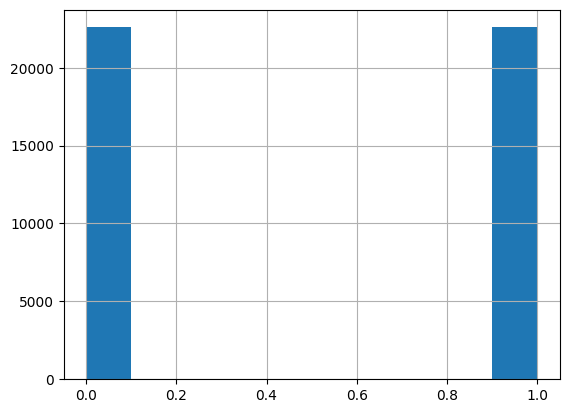

In [28]:
df2_balanced['Vulnerability_status'].hist()

In [29]:
df2_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,1041912,file,WARNING,External storage used,File var13 = new File(Environment.getExternalS...,CWE-921,Storage of Sensitive Data in a Mechanism witho...,1,File var13 = new File(Environment.getExternalS...
1,1426117,file,WARNING,Logging found,"Log.d((String)""#GEMS"", (String)(""getNumberOfGe...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
2,511098,NaN,NaN,NaN,var6 = var8.fontWeightAdjustment;,NaN,NaN,0,var6 = var8.fontWeightAdjustment;
3,1039249,file,WARNING,Logging found,"Log.v((String)object, (String)object13.toStrin...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.v((String)object, (String)object13.toStrin..."
4,586388,NaN,NaN,NaN,"var1.drawPath(this.field_3768, this.field_3777...",NaN,NaN,0,"var1.drawPath(this.field_3768, this.field_3777..."


In [30]:
df2_balanced.drop(['category', 'Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [31]:
df2_balanced.head(10)

,index,Vulnerability_status,processed_code
0,1041912,1,File var13 = new File(Environment.getExternalS...
1,1426117,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
2,511098,0,var6 = var8.fontWeightAdjustment;
3,1039249,1,"Log.v((String)object, (String)object13.toStrin..."
4,586388,0,"var1.drawPath(this.field_3768, this.field_3777..."
5,2844525,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
6,2880829,1,"Log.d(""user_str"", ""user_str"" + this.mRatio);"
7,2660746,0,object.setLocalOnly(false).setGroup(null).setG...
8,1438784,1,"Log.d(RevCommitListView.TAG, ""user_str"" + list..."
9,143597,0,"public int y1(final int n, final w w, final b0..."


In [32]:
df2_balanced.tail(10)

,index,Vulnerability_status,processed_code
45178,3257514,0,public final View field_1201;
45179,624038,1,"Log.e(Download.b, t.getMessage());"
45180,1660794,1,"P_URI_STRINGS = new String[] { ""user_str"", ""us..."
45181,2368616,1,"Log.w(DLNAController.TAG, ""user_str"".concat(St..."
45182,2786209,0,int var3 = this.field_2288.getCurrX();
45183,2478935,1,"Log.e(access$000, sb.toString());"
45184,1252026,0,boolean field_1557;
45185,3232288,0,this.mediaPeriod = (MediaPeriod)var11;
45186,1583390,1,"Log.v(tag2, sb2.toString());"
45187,1367437,0,string += scanner.next();


In [33]:
df2_balanced.dropna()

,index,Vulnerability_status,processed_code
0,1041912,1,File var13 = new File(Environment.getExternalS...
1,1426117,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
2,511098,0,var6 = var8.fontWeightAdjustment;
3,1039249,1,"Log.v((String)object, (String)object13.toStrin..."
4,586388,0,"var1.drawPath(this.field_3768, this.field_3777..."
...,...,...,...
45183,2478935,1,"Log.e(access$000, sb.toString());"
45184,1252026,0,boolean field_1557;
45185,3232288,0,this.mediaPeriod = (MediaPeriod)var11;
45186,1583390,1,"Log.v(tag2, sb2.toString());"


In [34]:
df2_balanced = df2_balanced[['processed_code', 'Vulnerability_status']]

In [35]:
df2_balanced.head()

,processed_code,Vulnerability_status
0,File var13 = new File(Environment.getExternalS...,1
1,"Log.d((String)""user_str"", (String)(""user_str"" ...",1
2,var6 = var8.fontWeightAdjustment;,0
3,"Log.v((String)object, (String)object13.toStrin...",1
4,"var1.drawPath(this.field_3768, this.field_3777...",0


In [36]:
df2_balanced.columns = ['text', 'labels']

In [37]:
df2_balanced.head(5)

,text,labels
0,File var13 = new File(Environment.getExternalS...,1
1,"Log.d((String)""user_str"", (String)(""user_str"" ...",1
2,var6 = var8.fontWeightAdjustment;,0
3,"Log.v((String)object, (String)object13.toStrin...",1
4,"var1.drawPath(this.field_3768, this.field_3777...",0


In [38]:
df2_balanced.head(5)

,text,labels
0,File var13 = new File(Environment.getExternalS...,1
1,"Log.d((String)""user_str"", (String)(""user_str"" ...",1
2,var6 = var8.fontWeightAdjustment;,0
3,"Log.v((String)object, (String)object13.toStrin...",1
4,"var1.drawPath(this.field_3768, this.field_3777...",0


In [39]:
df2_balanced.to_csv('processed_dataset.csv', index=False)

In [40]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [41]:
from datasets import load_dataset

In [42]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [43]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 45188
    })
})

In [44]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 36150
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 9038
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/graphcodebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/36150 [00:00<?, ? examples/s]

Map:   0%|          | 0/9038 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                       Param #
RobertaForSequenceClassification                             --
├─RobertaModel: 1-1                                          --
│    └─RobertaEmbeddings: 2-1                                --
│    │    └─Embedding: 3-1                                   38,603,520
│    │    └─Embedding: 3-2                                   394,752
│    │    └─Embedding: 3-3                                   768
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─RobertaEncoder: 2-2                                   --
│    │    └─ModuleList: 3-6                                  85,054,464
├─RobertaClassificationHead: 1-2                             --
│    └─Linear: 2-3                                           590,592
│    └─Dropout: 2-4                                          --
│    └─Linear: 2-5                                           1,538
To

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [56]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

In [57]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.151000,0.147040,0.957291,0.957092
2,0.103000,0.151283,0.963266,0.962979
3,0.061700,0.154307,0.963819,0.963959


TrainOutput(global_step=6780, training_loss=0.11359461978473495, metrics={'train_runtime': 2837.9789, 'train_samples_per_second': 38.214, 'train_steps_per_second': 2.389, 'total_flos': 2.8534393953792e+16, 'train_loss': 0.11359461978473495, 'epoch': 3.0})